#  <span style="color:blue">AutoML com Pycaret</span>

transformação de features do Pycaret

#### Instalando o Pycaret.

In [ ]:
#!pip install pycaret

#### Carregando o módulo de classificação e a função para buscar dados.

In [2]:
from pycaret.classification import *

In [1]:
from pycaret.datasets import get_data
import pandas as pd
import numpy as np
import seaborn as sns

# Conjunto de dados utilizado.

#### Carregando os dados.

In [3]:
dataset = get_data('income')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Listando registros missing por atributo.

In [4]:
dataset.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

#### Alterando os dados de features com registros missing

In [5]:
dataset["education-num"] = dataset["education-num"].mask(np.random.random(dataset["education-num"].shape)< 0.2)

In [6]:
dataset["capital-gain"] = dataset["capital-gain"].mask(np.random.random(dataset["capital-gain"].shape)<0.2)

#### Listando registros missing por atributo.

In [7]:
dataset.isnull().sum()

age                  0
workclass         1836
education            0
education-num     6548
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain      6558
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

# Configurando o ambiente com a função Setup.

## 1) imputação de dados para dados numericos e categoricos

Função Setup inicializa o ambiente no Pycaret e cria o pipeline de transformação e prepara os dados para modelagem e deploy.

In [10]:
exp_clf01 = setup(  data = dataset
                  , target = 'income >50K'
                  , session_id=123
                  , numeric_features = ["education-num"]
                  , numeric_imputation = "median"
                  , categorical_imputation = "mode" 
                 )

,Description,Value
0,Session id,123
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(32561, 14)"
4,Transformed data shape,"(32561, 64)"
5,Transformed train set shape,"(22792, 64)"
6,Transformed test set shape,"(9769, 64)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,8


##### Verificando o objeto criado.

In [11]:
exp_clf01

##### Armazenando o Dataframe transformado.

In [12]:
df_transformed = get_config("X_train")

##### Realizando a contagem de registros nulos por atributo.

In [14]:
df_transformed.isnull().sum()

age                  0
workclass         1317
education            0
education-num     4540
marital-status       0
occupation        1323
relationship         0
race                 0
sex                  0
capital-gain      4598
capital-loss         0
hours-per-week       0
native-country     419
dtype: int64

##### Verificando as estatísticas descritivas.

In [15]:
dataset["education-num"].describe()

count    26013.000000
mean        10.082843
std          2.576930
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

##### Verificando a distribuição da feature.

<AxesSubplot:xlabel='education-num', ylabel='Density'>

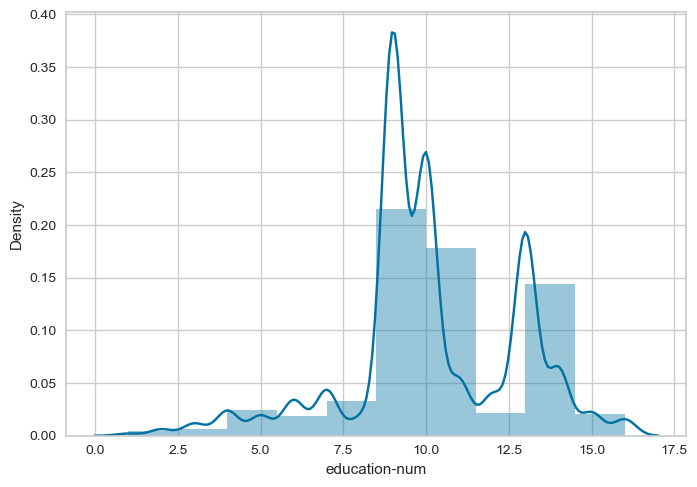

In [16]:
sns.distplot(dataset["education-num"],bins=10)

##### Verificando as estatísticas descritivas.

In [17]:
df_transformed["education-num"].describe()

count    18252.000000
mean        10.083443
std          2.593162
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

##### Verificando a distribuição da feature.

<AxesSubplot:xlabel='education-num', ylabel='Density'>

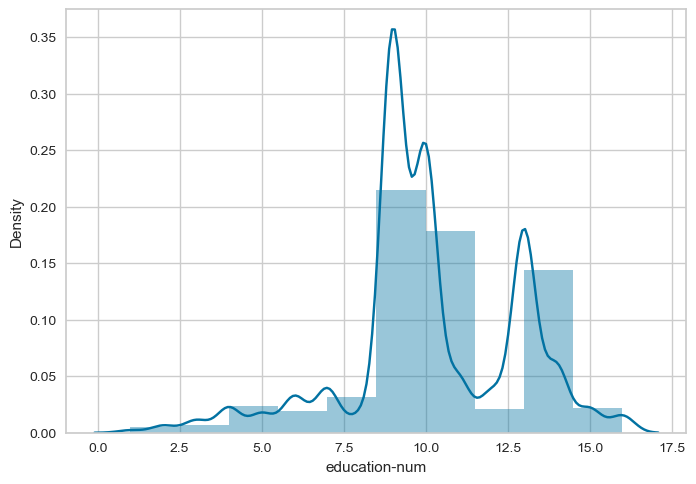

In [18]:
sns.distplot(df_transformed["education-num"],bins=10)

### Configurando o ambiente com a função Setup e Input Interativo

Função Setup inicializa o ambiente no Pycaret e cria o pipeline de transformação e prepara os dados para modelagem e deploy.

Alterando o tipo de input para utilizar um estimator.

In [19]:
exp_clf01 = setup(  data = dataset
                  , target = 'income >50K'
                  , session_id = 123
                  , numeric_features = ["education-num"]
                  , imputation_type = "iterative"
                  , iterative_imputation_iters = 5
                 )

,Description,Value
0,Session id,123
1,Target,income >50K
2,Target type,Binary
3,Original data shape,"(32561, 14)"
4,Transformed data shape,"(32561, 82)"
5,Transformed train set shape,"(22792, 82)"
6,Transformed test set shape,"(9769, 82)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,8


##### Armazenando o Dataframe transformado.

In [20]:
df_transformed = get_config("X_train")

##### Realizando a contagem de registros nulos por atributo.

In [21]:
df_transformed.isnull().sum()

age                  0
workclass         1317
education            0
education-num     4540
marital-status       0
occupation        1323
relationship         0
race                 0
sex                  0
capital-gain      4598
capital-loss         0
hours-per-week       0
native-country     419
dtype: int64

##### Verificando as estatísticas descritivas.

In [22]:
df_transformed["education-num"].describe()

count    18252.000000
mean        10.083443
std          2.593162
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

<AxesSubplot:xlabel='education-num', ylabel='Density'>

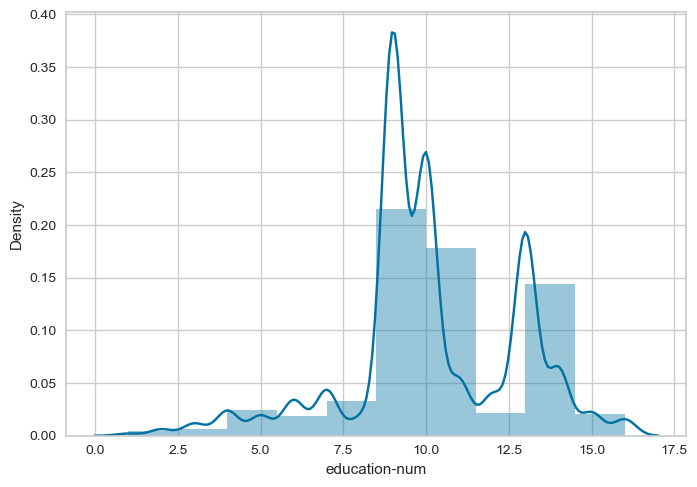

In [23]:
sns.distplot(dataset["education-num"],bins=10)

<AxesSubplot:xlabel='education-num', ylabel='Density'>

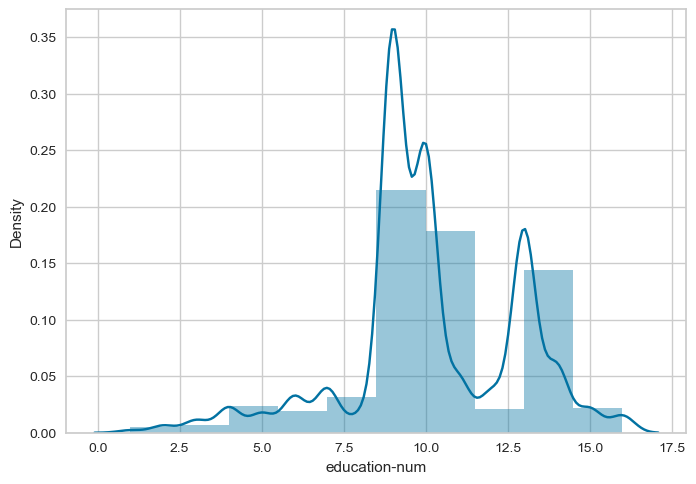

In [24]:
sns.distplot(df_transformed["education-num"],bins=10)

### Comparando métodos de input para registros missing.

##### Função para definição de setup treinamento e avaliação do modelo.

In [27]:
def compare_parameters(imputation_type, numeric_imputation, iterative_imputation_iters):
    results = {}
    print("Definindo o pipeline...")
    
    if imputation_type == "simple":
        exp_clf01 = setup(  data = dataset
                          , target = 'income >50K'
                          , session_id=123
                          , numeric_features= ["education-num"]
                          , imputation_type = imputation_type
                          , numeric_imputation = numeric_imputation
                          , verbose = False
                          , html = False
                     )
    else:
        exp_clf01 = setup(  data = dataset
                          , target = 'income >50K'
                          , session_id=123
                          , numeric_features= ["education-num"]
                          , imputation_type = imputation_type
                          , iterative_imputation_iters = iterative_imputation_iters
                          , verbose = False
                          , html = False
                     )
        
    
    print("Criando o modelo")
    lgbm = create_model('lightgbm'
                        , verbose = False
                        , html = False
                       )
    
    grid = pull()
    
    print("Armazenando o resultado")
    
    results["imputation_type"] = imputation_type
    results["numeric_imputation"] = numeric_imputation
    results["iterative_imputation_iters"] = iterative_imputation_iters
    results["accuracy_mean"] = grid["Accuracy"]["Mean"]
    
    
    return results

##### Definindo diferentes métodos e seus parametros.

In [29]:
scores = []
params = [
             ["simple","mean",0]
            ,["simple","median",0]
            ,["simple","zero",0]
            ,["iterative", 'mean',5]
            ,["iterative",'mean',10]
    ]
for row in params:
    print("Processando parametros {},{},{}".format(row[0],row[1],row[2]))
    
    scores.append(
        compare_parameters(row[0],row[1],row[2])
    )

Processando parametros simple,mean,0
Definindo o pipeline...
Criando o modelo
Armazenando o resultado
Processando parametros simple,median,0
Definindo o pipeline...
Criando o modelo
Armazenando o resultado
Processando parametros simple,zero,0
Definindo o pipeline...


ValueError: Invalid value for the numeric_imputation parameter, got zero. Choose from: drop, mean, median, mode, knn.

##### Verificando os resultados e seus scores.

In [40]:
for score in scores:
    print(score)

{'imputation_type': 'simple', 'numeric_imputation': 'mean', 'iterative_imputation_iters': 0, 'accuracy_mean': 0.8671}
{'imputation_type': 'simple', 'numeric_imputation': 'median', 'iterative_imputation_iters': 0, 'accuracy_mean': 0.8678}
{'imputation_type': 'simple', 'numeric_imputation': 'zero', 'iterative_imputation_iters': 0, 'accuracy_mean': 0.8684}
{'imputation_type': 'iterative', 'numeric_imputation': 0, 'iterative_imputation_iters': 5, 'accuracy_mean': 0.868}
{'imputation_type': 'iterative', 'numeric_imputation': 0, 'iterative_imputation_iters': 10, 'accuracy_mean': 0.8656}


#### E se aumentar o número de registros missing? O comportamento é o mesmo?

In [41]:
dataset["education-num"] = dataset["education-num"].mask(np.random.random(dataset["education-num"].shape)< 0.5)

In [42]:
dataset["capital-gain"] = dataset["capital-gain"].mask(np.random.random(dataset["capital-gain"].shape)< 0.5)

In [43]:
dataset.isnull().sum()

age                   0
workclass          1836
education             0
education-num     19520
marital-status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital-gain      19431
capital-loss          0
hours-per-week        0
native-country      583
income >50K           0
dtype: int64

##### Definindo diferentes métodos e seus parametros.

In [44]:
scores = []
params = [
             ["simple","mean",0]
            ,["simple","median",0]
            ,["simple","zero",0]
            ,["iterative",0,5]
            ,["iterative",0,10]
    ]
for row in params:
    print("Processando parametros {},{},{}".format(row[0],row[1],row[2]))
    
    scores.append(
        compare_parameters(row[0],row[1],row[2])
    )

Processando parametros simple,mean,0
Definindo o pipeline...
Criando o modelo
Armazenando o resultado
Processando parametros simple,median,0
Definindo o pipeline...
Criando o modelo
Armazenando o resultado
Processando parametros simple,zero,0
Definindo o pipeline...
Criando o modelo
Armazenando o resultado
Processando parametros iterative,0,5
Definindo o pipeline...
Criando o modelo
Armazenando o resultado
Processando parametros iterative,0,10
Definindo o pipeline...
Criando o modelo
Armazenando o resultado


##### Verificando os resultados e seus scores.

In [45]:
for score in scores:
    print(score)

{'imputation_type': 'simple', 'numeric_imputation': 'mean', 'iterative_imputation_iters': 0, 'accuracy_mean': 0.8586}
{'imputation_type': 'simple', 'numeric_imputation': 'median', 'iterative_imputation_iters': 0, 'accuracy_mean': 0.8589}
{'imputation_type': 'simple', 'numeric_imputation': 'zero', 'iterative_imputation_iters': 0, 'accuracy_mean': 0.8596}
{'imputation_type': 'iterative', 'numeric_imputation': 0, 'iterative_imputation_iters': 5, 'accuracy_mean': 0.8539}
{'imputation_type': 'iterative', 'numeric_imputation': 0, 'iterative_imputation_iters': 10, 'accuracy_mean': 0.8542}
